In [ ]:
#Instalamos Keras 3.3.3
!pip install keras==3.3.3
#Instalamos Keras NLP
!pip install keras-nlp==0.12.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.0 MB/s eta 0:00:00
     ━━━━━━

En este punto tras haber instalado Keras montamos Google Drive para cargar el dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


Cargamos el dataset, con o sin filtros generado por el generador de Pares creado por Daniel

In [ ]:
import pandas as pd
# Cargamos el fichero creado por Daniel en un dataframe
df = pd.read_csv('/content/gdrive/MyDrive/TFM - KSCHOOL - DataScience/Recursos/output_nofilters2.csv')
df.head()

,natural_language_query,metrics,dimensions,start_date,end_date,dimensionFilter,metricFilter
0,Comunícame duración del uso del usuario y comp...,userEngagementDuration;ecommercePurchases,mobileDeviceBranding,NaN,NaN,NaN,NaN
1,Muestra recuento de eventos por continente,eventCount,continent,NaN,NaN,NaN,NaN
2,Testifícame cantidad de eventos por sesión y i...,eventsPerSession;purchaseRevenue,sessionCampaignName,NaN,NaN,NaN,NaN
3,Comunica sesiones promedio por usuario,sessionsPerUser,NaN,NaN,NaN,NaN,NaN
4,Explica entradas,sessions,NaN,NaN,NaN,NaN,NaN


Procesamos el dataset para crear una columna **target** con la "traducción" de la frase a formato:<br>
*get metric1 metric2 segmentedBy dimension1 filteredBy filter*

In [ ]:
import re
import json
print(df.dtypes)
df['metrics'] = df['metrics'].apply(lambda x: re.sub(';', ' ', x))
df['dimensions'] = df['dimensions'].fillna('none')
df['dimensions'] = df['dimensions'].apply(lambda x: re.sub(';', ' ', x))
df['dimensionFilter'] = df['dimensionFilter'].fillna('none')
df['dimensionFilter'] = df['dimensionFilter'].astype('str')
df['dimensionFilter'] = df['dimensionFilter'].apply(lambda x: re.sub(';', ' ', x))
df['dimensionFilter'] = df['dimensionFilter'].apply(lambda x: re.sub('_', '', x))
df['target'] = 'get ' + df['metrics'] + ' segmentedBy ' + df['dimensions']# + ' filteredBy ' + df['dimensionFilter']


natural_language_query     object
metrics                    object
dimensions                 object
start_date                float64
end_date                  float64
dimensionFilter           float64
metricFilter              float64
dtype: object



## Limpieza y normalización

Este fragmento de código se encarga de limpiar y preparar textos dentro de un DataFrame en Python. A continuación, se detalla cada función y operación:

### Importaciones
```python
import re
from unicodedata import normalize
```
Se importan dos módulos:
- `re`: Módulo para trabajar con expresiones regulares en Python.
- `normalize` de `unicodedata`: Función para normalizar cadenas de texto en Unicode.

### Función `clean_text`
```python
def clean_text(text):
    text = normalize('NFD', text.lower())
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    return text
```
Esta función realiza la limpieza básica de un texto:
1. Normaliza el texto a la forma `NFD` y lo convierte a minúsculas.
2. Elimina todos los caracteres que no sean letras, números o espacios.
3. Devuelve el texto limpio.

### Función `clean_and_prepare_text`
```python
def clean_and_prepare_text(text):
    text = '[start] ' + text + ' [end]'
    return text
```
Esta función prepara un texto añadiendo etiquetas de inicio y fin:
1. Agrega la etiqueta `[start]` al comienzo del texto.
2. Agrega la etiqueta `[end]` al final del texto.
3. Devuelve el texto preparado.

### Aplicación a un DataFrame
```python
df['natural_language_query'] = df['natural_language_query'].apply(lambda row: clean_text(row))
df['target'] = df['target'].apply(lambda row: clean_and_prepare_text(row))
df.head()
```
Estas líneas aplican las funciones de limpieza y preparación a las columnas especificadas de un DataFrame `df`:
1. Limpia los textos en la columna `natural_language_query` utilizando la función `clean_text`.
2. Prepara los textos en la columna `target` utilizando la función `clean_and_prepare_text`.
3. Muestra las primeras filas del DataFrame para verificar los cambios.

## Uso

Para utilizar este código, asegúrate de tener un DataFrame `df` con las columnas `natural_language_query` y `target`. Luego, simplemente ejecuta el código para limpiar y preparar los textos en estas columnas.


In [ ]:
import re
from unicodedata import normalize

def clean_text(text):
    text = normalize('NFD', text.lower())
    text = re.sub('[^A-Za-z0-9 ]+', '', text)
    return text

def clean_and_prepare_text(text):
    text = '[start] ' + text + ' [end]'
    return text

df['natural_language_query'] = df['natural_language_query'].apply(lambda row: clean_text(row))
df['target'] = df['target'].apply(lambda row: clean_and_prepare_text(row))
df.head()

,natural_language_query,metrics,dimensions,start_date,end_date,dimensionFilter,metricFilter,target
0,comunicame duracion del uso del usuario y comp...,userEngagementDuration ecommercePurchases,mobileDeviceBranding,NaN,NaN,none,NaN,[start] get userEngagementDuration ecommercePu...
1,muestra recuento de eventos por continente,eventCount,continent,NaN,NaN,none,NaN,[start] get eventCount segmentedBy continent [...
2,testificame cantidad de eventos por sesion y i...,eventsPerSession purchaseRevenue,sessionCampaignName,NaN,NaN,none,NaN,[start] get eventsPerSession purchaseRevenue s...
3,comunica sesiones promedio por usuario,sessionsPerUser,none,NaN,NaN,none,NaN,[start] get sessionsPerUser segmentedBy none [...
4,explica entradas,sessions,none,NaN,NaN,none,NaN,[start] get sessions segmentedBy none [end]



## Cáculo de longitudes

Este fragmento de código se encarga de calcular la longitud máxima de las frases en dos columnas de un DataFrame y determinar la longitud de secuencia más larga entre ellas. A continuación, se detalla cada operación:

### Variables Iniciales
```python
nl = df['natural_language_query']
api = df['target']
```
Se extraen dos columnas del DataFrame `df`:
- `nl`: Contiene las consultas en lenguaje natural.
- `api`: Contiene los objetivos o resultados esperados.

### Cálculo de Longitudes Máximas
```python
nl_max_len = max(len(line.split()) for line in nl)
api_max_len = max(len(line.split()) for line in api)
sequence_len = max(nl_max_len, api_max_len)
```
Se calcula la longitud máxima de las frases en cada columna:
1. `nl_max_len`: Longitud máxima de las frases en la columna `nl`, medida en número de palabras.
2. `api_max_len`: Longitud máxima de las frases en la columna `api`, medida en número de palabras.
3. `sequence_len`: La mayor longitud entre `nl_max_len` y `api_max_len`.

### Impresión de Resultados
```python
print(f'Max phrase length (NL): {nl_max_len}')
print(f'Max phrase length (API): {api_max_len}')
print(f'Sequence length: {sequence_len}')
```
Se imprimen las longitudes calculadas:
- Longitud máxima de frases en lenguaje natural (`nl`).
- Longitud máxima de frases en los objetivos (`api`).
- Longitud de secuencia más larga entre las dos columnas.

## Uso

Para utilizar este código, asegúrate de tener un DataFrame `df` con las columnas `natural_language_query` y `target`. Luego, simplemente ejecuta el código para calcular y visualizar las longitudes máximas de las frases y la longitud de secuencia más larga entre las dos columnas.


In [ ]:
nl = df['natural_language_query']
api = df['target']

nl_max_len = max(len(line.split()) for line in nl)
api_max_len = max(len(line.split()) for line in api)
sequence_len = max(nl_max_len, api_max_len)

print(f'Max phrase length (NL): {nl_max_len}')
print(f'Max phrase length (API): {api_max_len}')
print(f'Sequence length: {sequence_len}')

Max phrase length (NL): 23
Max phrase length (API): 7
Sequence length: 23



## Tokenizacion

Este fragmento de código se encarga de tokenizar y paddear secuencias de texto para dos columnas de un DataFrame usando TensorFlow. A continuación, se detalla cada operación:

### Importaciones
```python
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
```
Se importan dos módulos de `tensorflow.keras`:
- `Tokenizer`: Para convertir texto a secuencias de números.
- `pad_sequences`: Para paddear (rellenar) secuencias a una longitud fija.

### Tokenización y Padding para `nl`
```python
nl_tokenizer = Tokenizer()
nl_tokenizer.fit_on_texts(nl)
nl_sequences = nl_tokenizer.texts_to_sequences(nl)
nl_x = pad_sequences(nl_sequences, maxlen=sequence_len, padding='post')
```
1. Se crea una instancia de `Tokenizer` para la columna `nl`.
2. Se ajusta el tokenizador a los textos en `nl` usando `fit_on_texts`.
3. Se convierten los textos en `nl` a secuencias de números (`nl_sequences`).
4. Se paddean las secuencias a la longitud `sequence_len` con padding posterior (`padding='post'`).

### Tokenización y Padding para `api`
```python
api_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@\^_`{|}~
')
api_tokenizer.fit_on_texts(api)
api_sequences = api_tokenizer.texts_to_sequences(api)
api_y = pad_sequences(api_sequences, maxlen=sequence_len + 1, padding='post')
```
1. Se crea una instancia de `Tokenizer` para la columna `api`, especificando un conjunto de filtros personalizados para excluir ciertos caracteres.
2. Se ajusta el tokenizador a los textos en `api` usando `fit_on_texts`.
3. Se convierten los textos en `api` a secuencias de números (`api_sequences`).
4. Se paddean las secuencias a la longitud `sequence_len + 1` con padding posterior (`padding='post'`).

## Uso

Para utilizar este código, asegúrate de tener un DataFrame `df` con las columnas `natural_language_query` y `target`, y haber calculado `sequence_len` como se muestra en ejemplos anteriores. Luego, simplemente ejecuta el código para tokenizar y paddear las secuencias de texto en estas columnas.


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nl_tokenizer = Tokenizer()
nl_tokenizer.fit_on_texts(nl)
nl_sequences = nl_tokenizer.texts_to_sequences(nl)
nl_x = pad_sequences(nl_sequences, maxlen=sequence_len, padding='post')

api_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n')
api_tokenizer.fit_on_texts(api)
api_sequences = api_tokenizer.texts_to_sequences(api)
api_y = pad_sequences(api_sequences, maxlen=sequence_len + 1, padding='post')


# Tamaño del vocabulario

Este fragmento de código calcula el tamaño del vocabulario para dos tokenizadores y los imprime. A continuación, se detalla cada operación:

### Cálculo del Tamaño del Vocabulario
```python
nl_vocab_size = len(nl_tokenizer.word_index) + 1
api_vocab_size = len(api_tokenizer.word_index) + 1
```
1. `nl_vocab_size`: Calcula el tamaño del vocabulario del tokenizador `nl_tokenizer`, sumando 1 al número de palabras únicas (`word_index`).
2. `api_vocab_size`: Calcula el tamaño del vocabulario del tokenizador `api_tokenizer`, sumando 1 al número de palabras únicas (`word_index`).

### Impresión de Resultados
```python
print(f'Vocabulary size (NL): {nl_vocab_size}')
print(f'Vocabulary size (API): {api_vocab_size}')
```
Se imprimen los tamaños de vocabulario calculados:
- Tamaño del vocabulario para el lenguaje natural (`nl_vocab_size`).
- Tamaño del vocabulario para los objetivos (`api_vocab_size`).

## Uso

Para utilizar este código, asegúrate de haber tokenizado los textos en `nl` y `api` utilizando instancias de `Tokenizer` como se muestra en ejemplos anteriores. Luego, simplemente ejecuta el código para calcular e imprimir los tamaños de vocabulario.


In [ ]:
nl_vocab_size = len(nl_tokenizer.word_index) + 1
api_vocab_size = len(api_tokenizer.word_index) + 1

print(f'Vocabulary size (NL): {nl_vocab_size}')
print(f'Vocabulary size (API): {api_vocab_size}')

Vocabulary size (NL): 395
Vocabulary size (API): 96



# Datos de entrada y salida

Este fragmento de código prepara los datos de entrada y salida para un modelo de aprendizaje automático, típicamente utilizado en tareas de secuencias como traducción o procesamiento de lenguaje natural. A continuación, se detalla cada operación:

### Preparación de Datos de Entrada y Salida
```python
inputs = { 'encoder_input': nl_x, 'decoder_input': api_y[:, :-1] }
outputs = api_y[:, 1:]
```
1. `inputs`: Un diccionario que contiene dos entradas:
   - `'encoder_input'`: Asignado a `nl_x`, que contiene las secuencias tokenizadas y paddeadas del lenguaje natural.
   - `'decoder_input'`: Asignado a `api_y[:, :-1]`, que contiene las secuencias tokenizadas y paddeadas del objetivo (`api`), excluyendo el último token de cada secuencia.
2. `outputs`: Asignado a `api_y[:, 1:]`, que contiene las secuencias del objetivo (`api`), excluyendo el primer token de cada secuencia. Esto se utiliza como las secuencias esperadas de salida en un modelo de secuencia a secuencia.

### Uso

Este fragmento de código es comúnmente utilizado en modelos de secuencia a secuencia (sequence-to-sequence), donde:
- `encoder_input` (entrada del codificador) es la secuencia de entrada original.
- `decoder_input` (entrada del decodificador) es la secuencia de salida desplazada por un token (excluyendo el último token).
- `outputs` (salidas esperadas) son las secuencias de salida desplazadas por un token (excluyendo el primer token).

Para utilizar este código, asegúrate de haber tokenizado y paddeado las secuencias de texto como se muestra en ejemplos anteriores. Luego, simplemente ejecuta el código para preparar las entradas y salidas para el modelo.


In [ ]:
inputs = { 'encoder_input': nl_x, 'decoder_input': api_y[:, :-1] }
outputs = api_y[:, 1:]

# Creación y entrenamiento del modelo


## Explicación del Código

Este fragmento de código construye y compila un modelo de Transformer para tareas de procesamiento de lenguaje natural usando TensorFlow y Keras. A continuación, se detalla cada operación:

### Importaciones
```python
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder, TransformerDecoder
```
Se importan los módulos necesarios:
- `numpy` y `tensorflow` para manipulación numérica y construcción de modelos.
- Componentes de `tensorflow.keras` para crear el modelo y capas.
- Componentes específicos de `keras_nlp` para embeddings y capas de Transformer.

### Configuración de Semillas Aleatorias
```python
np.random.seed(42)
tf.random.set_seed(42)
```
Se configuran las semillas aleatorias para reproducibilidad.

### Parámetros del Modelo
```python
num_heads = 8
embed_dim = 256
```
Se definen los parámetros del modelo:
- `num_heads`: Número de cabezas en las capas de atención del Transformer.
- `embed_dim`: Dimensión de los embeddings.

### Construcción del Codificador (Encoder)
```python
encoder_input = Input(shape=(None,), dtype='int64', name='encoder_input')
x = TokenAndPositionEmbedding(nl_vocab_size, sequence_len, embed_dim)(encoder_input)
encoder_output = TransformerEncoder(embed_dim, num_heads)(x)
```
1. `encoder_input`: Capa de entrada para el codificador.
2. `TokenAndPositionEmbedding`: Capa de embedding que combina embeddings de tokens y posiciones.
3. `TransformerEncoder`: Capa de codificador Transformer.

### Construcción del Decodificador (Decoder)
```python
encoded_seq_input = Input(shape=(None, embed_dim))

decoder_input = Input(shape=(None,), dtype='int64', name='decoder_input')
x = TokenAndPositionEmbedding(api_vocab_size, sequence_len, embed_dim, mask_zero=True)(decoder_input)
x = TransformerDecoder(embed_dim, num_heads)(x, encoded_seq_input)
x = Dropout(0.4)(x)

decoder_output = Dense(api_vocab_size, activation='softmax')(x)
```
1. `encoded_seq_input`: Entrada de secuencias codificadas para el decodificador.
2. `decoder_input`: Capa de entrada para el decodificador.
3. `TokenAndPositionEmbedding`: Capa de embedding para el decodificador con `mask_zero` activado.
4. `TransformerDecoder`: Capa de decodificador Transformer.
5. `Dropout`: Capa de regularización.
6. `Dense`: Capa densa con activación softmax para generar la salida final.

### Definición del Modelo
```python
decoder = Model([decoder_input, encoded_seq_input], decoder_output)
decoder_output = decoder([decoder_input, encoder_output])

model = Model([encoder_input, decoder_input], decoder_output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=120)
```
1. Se define un modelo intermedio `decoder` para el decodificador.
2. Se conecta la salida del codificador con el decodificador.
3. Se define el modelo completo que toma `encoder_input` y `decoder_input`.
4. Se compila el modelo con el optimizador `adam` y la función de pérdida `sparse_categorical_crossentropy`.
5. Se imprime un resumen del modelo.

## Uso

Este código construye y compila un modelo Transformer adecuado para tareas de secuencia a secuencia en procesamiento de lenguaje natural. Asegúrate de tener definidos `nl_vocab_size`, `api_vocab_size` y `sequence_len` antes de ejecutar este código.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder
from keras_nlp.layers import TransformerDecoder

np.random.seed(42)
tf.random.set_seed(42)

num_heads = 8
embed_dim = 256

encoder_input = Input(shape=(None,), dtype='int64', name='encoder_input')
x = TokenAndPositionEmbedding(nl_vocab_size, sequence_len, embed_dim)(encoder_input)
encoder_output = TransformerEncoder(embed_dim, num_heads)(x)
encoded_seq_input = Input(shape=(None, embed_dim))

decoder_input = Input(shape=(None,), dtype='int64', name='decoder_input')
x = TokenAndPositionEmbedding(api_vocab_size, sequence_len, embed_dim, mask_zero=True)(decoder_input)
x = TransformerDecoder(embed_dim, num_heads)(x, encoded_seq_input)
x = Dropout(0.4)(x)

decoder_output = Dense(api_vocab_size, activation='softmax')(x)
decoder = Model([decoder_input, encoded_seq_input], decoder_output)
decoder_output = decoder([decoder_input, encoder_output])

model = Model([encoder_input, decoder_input], decoder_output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=120)

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                      ┃ Output Shape                 ┃           Param # ┃ Connected to              
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ encoder_input (InputLayer)        │ (None, None)                 │                 0 │ -                         
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ token_and_position_embedding_10   │ (None, None, 256)            │           107,008 │ encoder_input[0][0]       
│ (TokenAndPositionEmbedding)       │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ decoder_input (InputLayer)        │ (None, None)                 │                 0 │ -                         
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ transformer_encoder_5             │ (None, None, 256)            │           395,776 │ token_and_position_embeddi
│ (TransformerEncoder)              │                              │                   │                           
├───────────────────────────────────┼──────────────────────────────┼───────────────────┼───────────────────────────
│ functional_21 (Functional)        │ (None, None, 96)             │           714,592 │ decoder_input[0][0],      
│                                   │                              │                   │ transformer_encoder_5[0][0
└───────────────────────────────────┴──────────────────────────────┴───────────────────┴───────────────────────────

 Total params: 1,217,376 (4.64 MB)

 Trainable params: 1,217,376 (4.64 MB)

 Non-trainable params: 0 (0.00 B)


## Entrenamiento

Este fragmento de código configura y entrena un modelo de aprendizaje automático, y luego guarda el modelo entrenado en un archivo. A continuación, se detalla cada operación:

### Importaciones
```python
from tensorflow.keras.callbacks import EarlyStopping
```
Se importa `EarlyStopping` de `tensorflow.keras.callbacks`, que es una técnica para detener el entrenamiento temprano si la métrica de validación no mejora.

### Configuración del Callback EarlyStopping
```python
callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
```
1. `monitor='val_accuracy'`: Monitorea la métrica de precisión en el conjunto de validación.
2. `patience=3`: Detiene el entrenamiento si la métrica de validación no mejora después de 3 épocas consecutivas.
3. `restore_best_weights=True`: Restaura los pesos del modelo al estado de la mejor época.

### Entrenamiento del Modelo
```python
#hist = model.fit(inputs, outputs, epochs=30, validation_split=0.3, callbacks=[callback])
hist = model.fit(inputs, outputs, epochs=30, validation_split=0.2)
```
1. `inputs` y `outputs`: Datos de entrada y salida para el entrenamiento.
2. `epochs=30`: Número de épocas para entrenar el modelo.
3. `validation_split=0.2`: Porcentaje de datos utilizados para la validación (20% en este caso).

El comentario indica que se puede usar un `validation_split` del 30% y el callback `EarlyStopping`, pero la línea activa usa un `validation_split` del 20% sin el callback.

### Guardado del Modelo
```python
model.save('/content/gdrive/MyDrive/TFM - KSCHOOL - DataScience/Recursos/modeloBS64.keras')
```
Guarda el modelo entrenado en un archivo en el directorio especificado. El archivo tendrá la extensión `.keras`.

## Uso

Para utilizar este código, asegúrate de haber definido y compilado un modelo como se muestra en ejemplos anteriores. Luego, simplemente ejecuta el código para entrenar el modelo con los datos `inputs` y `outputs`, y guarda el modelo entrenado en la ubicación especificada.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
#hist = model.fit(inputs, outputs, epochs=30, validation_split=0.3, callbacks=[callback])
hist = model.fit(inputs, outputs, epochs=30, validation_split=0.2)
model.save('/content/gdrive/MyDrive/TFM - KSCHOOL - DataScience/Recursos/modeloBS64.keras')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'position_embedding' (of type PositionEmbedding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.2995 - loss: 0.3194 - val_accuracy: 0.3112 - val_loss: 0.0896
Epoch 2/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 32s 6ms/step - accuracy: 0.3418 - loss: 0.0575 - val_accuracy: 0.3536 - val_loss: 0.0263
Epoch 3/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5810 - loss: 0.0467 - val_accuracy: 0.9653 - val_loss: 0.0269
Epoch 4/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9749 - loss: 0.0407 - val_accuracy: 0.9807 - val_loss: 0.0311
Epoch 5/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9770 - loss: 0.0456 - val_accuracy: 0.9892 - val_loss: 0.0296
Epoch 6/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9013 - loss: 0.0436 - val_accuracy: 0.8976 - val_loss: 0.1398
Epoch 7/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8564 - loss: 0.0557 - val_accuracy: 0.5418 - val_loss: 0.0328
Epoch 8/30
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7198 - loss: 0.0551 - val

# Comparativa accuracy


## Explicación del Código

Este fragmento de código visualiza la precisión del modelo durante el entrenamiento y la validación utilizando Seaborn y Matplotlib. A continuación, se detalla cada operación:

### Importaciones
```python
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
```
1. `seaborn` y `matplotlib.pyplot` se importan para crear gráficos.
2. `%matplotlib inline` se usa en Jupyter Notebooks para mostrar los gráficos en línea.
3. `sns.set()` configura el estilo estético de Seaborn para los gráficos.

### Extracción de Datos de Historial
```python
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
```
1. `acc`: Lista de valores de precisión durante el entrenamiento.
2. `val`: Lista de valores de precisión durante la validación.
3. `epochs`: Rango de épocas utilizado para el eje x en el gráfico.

### Creación del Gráfico
```python
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
```
1. `plt.plot(epochs, acc, '-', label='Training accuracy')`: Grafica la precisión del entrenamiento con una línea sólida.
2. `plt.plot(epochs, val, ':', label='Validation accuracy')`: Grafica la precisión de la validación con una línea punteada.
3. `plt.title('Training and Validation Accuracy')`: Establece el título del gráfico.
4. `plt.xlabel('Epoch')`: Etiqueta el eje x como "Epoch".
5. `plt.ylabel('Accuracy')`: Etiqueta el eje y como "Accuracy".
6. `plt.legend(loc='lower right')`: Muestra la leyenda en la parte inferior derecha del gráfico.

## Uso

Para utilizar este código, asegúrate de haber entrenado un modelo y tener disponible el historial (`hist`). Luego, simplemente ejecuta el código para visualizar la precisión del modelo durante el entrenamiento y la validación.


[]

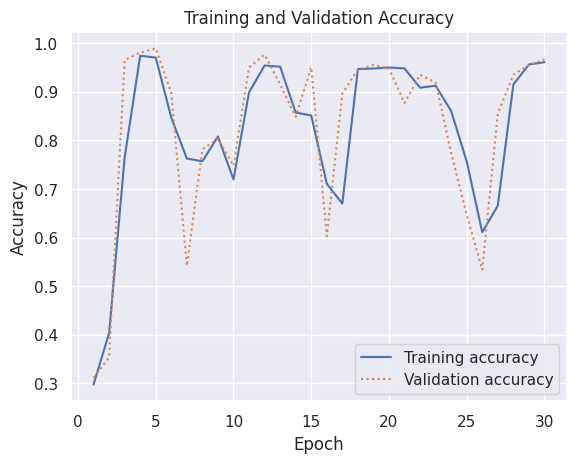

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


## Explicación del Código

Este fragmento de código define una función para traducir texto usando un modelo de secuencia a secuencia (sequence-to-sequence) y luego utiliza esa función para traducir un conjunto de textos. A continuación, se detalla cada operación:

### Función `translate_text`
```python
def translate_text(text, model, en_tokenizer, fr_tokenizer, fr_index_lookup, sequence_len):
    input_sequence = en_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = fr_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]
        prediction = model([padded_input_sequence, padded_target_sequence])
        idx = np.argmax(prediction[0, i, :]) - 1
        token = fr_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens
```
1. `input_sequence`: Convierte el texto de entrada a una secuencia de números usando el `en_tokenizer`.
2. `padded_input_sequence`: Paddea la secuencia de entrada a la longitud `sequence_len`.
3. `decoded_text`: Inicializa el texto decodificado con el token `[start]`.
4. Bucle `for`:
   - Convierte el texto decodificado actual a una secuencia de números usando el `fr_tokenizer`.
   - Paddea la secuencia del objetivo a la longitud `sequence_len` excluyendo el último token.
   - Predice el siguiente token utilizando el modelo.
   - Encuentra el índice del token con la mayor probabilidad y obtiene el token correspondiente del `fr_index_lookup`.
   - Añade el token decodificado al texto decodificado.
   - Si el token es `[end]`, se detiene el bucle.
5. Retorna el texto decodificado sin los tokens `[start]` y `[end]`.

### Preparación y Traducción de Textos
```python
api_vocab = api_tokenizer.word_index
api_index_lookup = dict(zip(range(len(api_vocab)), api_vocab))
texts = nl[0:25].values

for text in texts:
    translated = translate_text(text, model, nl_tokenizer, api_tokenizer, api_index_lookup, sequence_len)
    print(f'{text} => {translated}')
```
1. `api_vocab`: Obtiene el índice de palabras del `api_tokenizer`.
2. `api_index_lookup`: Crea un diccionario para buscar tokens por su índice.
3. `texts`: Selecciona los primeros 25 textos de la columna `nl`.
4. Bucle `for`:
   - Traduce cada texto utilizando la función `translate_text`.
   - Imprime el texto original y su traducción.

## Uso

Para utilizar este código, asegúrate de tener un modelo entrenado y los tokenizadores (`en_tokenizer` y `fr_tokenizer`). Luego, simplemente define la función `translate_text` y ejecuta el bloque de traducción de textos para ver las traducciones.


In [ ]:
def translate_text(text, model, en_tokenizer, fr_tokenizer, fr_index_lookup, sequence_len):
    input_sequence = en_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = fr_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]
        prediction = model([padded_input_sequence, padded_target_sequence])
        idx = np.argmax(prediction[0, i, :]) - 1
        token = fr_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens


api_vocab = api_tokenizer.word_index
api_index_lookup = dict(zip(range(len(api_vocab)), api_vocab))
texts = nl[0:25].values

for text in texts:
    translated = translate_text(text, model, nl_tokenizer, api_tokenizer, api_index_lookup, sequence_len)
    print(f'{text} => {translated}')

comunicame duracion del uso del usuario y compras digitales por marca del gadget => get userengagementduration ecommercepurchases segmentedby mobiledevicebranding
muestra recuento de eventos por continente => get eventcount segmentedby continent
testificame cantidad de eventos por sesion y ingresos globales por compras por denominacion de la campana de la sesion => get eventspersession grosspurchaserevenue segmentedby sessioncampaignname
comunica sesiones promedio por usuario => get sessionsperuser segmentedby none
explica entradas => get sessions segmentedby none
aclara ganancias totales por articulo y cantidad de eventos por proyecto publicitario => get grossitemrevenue eventcount segmentedby campaignname
explica total de eventos y ingresos brutos por compras => get eventcount grosspurchaserevenue segmentedby none
presenta vistas de pantalla por sesion por semana en curso => get screenpageviews segmentedby week
relata accesos y total de eventos por direccion completa de la pagina => 

In [ ]:
traduccion = translate_text("dime las compras por fecha", model, nl_tokenizer, api_tokenizer, api_index_lookup, sequence_len)

In [ ]:
traduccion

'get transactions segmentedby date'

In [ ]:
model.save('/content/gdrive/MyDrive/TFM - KSCHOOL - DataScience/Recursos/modelo5.keras')

In [ ]:
import keras as keras
model2 = keras.models.load_model('modelo_ok.keras')

# Cargar modelo y hacer peticiones a la API de GA4.

In [ ]:
def translate_text(text, model, en_tokenizer, fr_tokenizer, fr_index_lookup, sequence_len):
    input_sequence = en_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = fr_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]
        prediction = model([padded_input_sequence, padded_target_sequence])
        idx = np.argmax(prediction[0, i, :]) - 1
        token = fr_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens

In [ ]:
import keras
from google.colab import drive
drive.mount('/content/gdrive')
model_ok = keras.models.load_model('/content/gdrive/MyDrive/TFM - KSCHOOL - DataScience/Recursos/modelo08072024.keras')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
api_vocab = api_tokenizer.word_index
api_index_lookup = dict(zip(range(len(api_vocab)), api_vocab))
traduccion = translate_text("Dime las sesiones por categoria de dispositivo", model_ok, nl_tokenizer, api_tokenizer, api_index_lookup, sequence_len)
traduccion


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'position_embedding' (of type PositionEmbedding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.

'get transactions segmentedby devicecategory filteredby none'

In [ ]:
import pandas as pd
def parseTranslate(text):

  metrics = []
  dimensions = []
  filters = []

  is_metric = True
  is_dimension = False
  is_filter = False

  for word in text.split():

    if (word == 'segmentedby'):
      is_metric = False
      is_dimension = True
      is_filter = False
    elif (word == 'filteredby'):
      is_metric = False
      is_dimension = False
      is_filter = True

    if (word != 'get' and word != 'segmentedby' and word != 'filteredby'):
      if is_metric:
        metrics.append(word)
      elif is_dimension:
        dimensions.append(word)
      elif is_filter:
        filters.append(word)

  return metrics, dimensions, filters

def camelCase(api_parameters, list, type):

  return_list = []

  if type == 'm':
    for word in list:
      if word == 'none':
        return 'none'
      else:
        filas_con_palabra = api_parameters[api_parameters['Nombre de la API'].str.lower().str.fullmatch(word, na=False)]
        return_list.append(filas_con_palabra['Nombre de la API'].unique()[0])

    return return_list

  if type == 'd':
    for word in list:
      if word == 'none':
        return 'none'
      else:
        filas_con_palabra = api_parameters[api_parameters['Nombre de la API'].str.lower().str.fullmatch(word, na=False)]
        return_list.append(filas_con_palabra['Nombre de la API'].unique()[0])

    return return_list


In [ ]:
m, d, f = parseTranslate('get activeusers segmentedby devicemodel filteredby none')
m

['activeusers']

In [ ]:
metric_lookup = pd.read_csv('/content/gdrive/MyDrive/TFM - KSCHOOL - DataScience/Recursos/Métricas y dimensiones/metrics_lookuptable.csv')
dimension_lookup = pd.read_csv('/content/gdrive/MyDrive/TFM - KSCHOOL - DataScience/Recursos/Métricas y dimensiones/dimensions_lookuptable.csv')

In [ ]:
m = camelCase(metric_lookup, m, 'm')
m

['activeUsers']

In [ ]:
d = camelCase(dimension_lookup, d, 'd')
d

['deviceCategory']

In [ ]:
!pip install google-analytics-data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install google-analytics-admin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.0/313.0 kB 6.3 MB/s eta 0:00:00


In [ ]:
from google.oauth2 import service_account
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import (
    DateRange,
    Dimension,
    Metric,
    RunReportRequest,
)

credentials = service_account.Credentials.from_service_account_file('analiticro-d937f7a1303a.json')
client_data = BetaAnalyticsDataClient(credentials = credentials)

In [ ]:
metrics_api = []
dimensions_api = []
for metric in m:
  metrics_api.append(Metric(name=metric))

for dimension in d:
  dimensions_api.append(Dimension(name=dimension))

In [ ]:
request = RunReportRequest(
        property=f"properties/299616702",
        dimensions=dimensions_api,
        metrics=metrics_api,
        date_ranges=[DateRange(start_date="90daysAgo", end_date="today")],
    )
response = client_data.run_report(request)

In [ ]:
print("Resultado")
retorno = ''
for row in response.rows:
    dim = 0
    for dimension in d:
      retorno += dimension + ' = ' + str(row.dimension_values[dim].value) + ' '
      dim += 1

    met = 0
    for metric in m:
      retorno += metric + ' = ' + str(row.metric_values[met].value) + ' '
      met += 1

    retorno += '\n'

retorno

Resultado


'deviceCategory = desktop totalUsers = 382 sessions = 545 \ndeviceCategory = mobile totalUsers = 36 sessions = 40 \ndeviceCategory = tablet totalUsers = 6 sessions = 7 \n'